### Task : Classification (KNN Classifier -> Multiclass)
#### Input Features (Predictor Variables) : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
#### Output (Response Variable(s)) : Class (0 or 1 or 2)

### Importing the necessary modules

In [3]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, model_selection, preprocessing, metrics, datasets, base

### Collecting, Analyzing and Visualizing the Data

In [265]:
data = datasets.load_iris()

print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [266]:
# Creating a data frame (for analysis)

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [267]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [269]:
# Checking for null values

print(df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [270]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [271]:
# Correlation Matrix

corr_matrix = df.iloc[:, :-1].corr()

corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


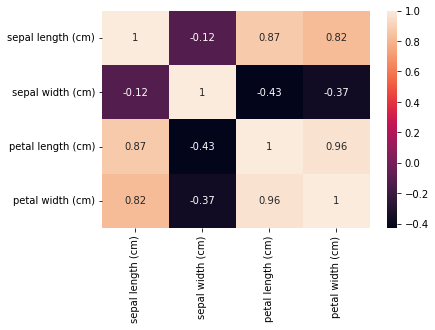

In [272]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

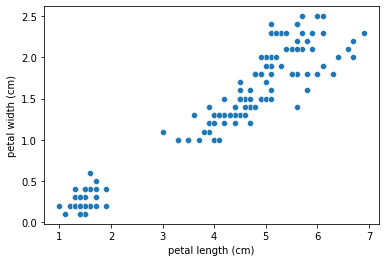

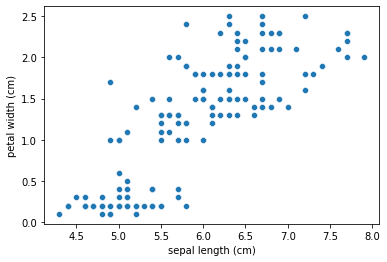

In [273]:
# Scatter Plot

sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = df)
plt.show()

sns.scatterplot(x = 'sepal length (cm)', y = 'petal width (cm)', data = df)
plt.show()

In [274]:
num_attr = df.columns[:-1]

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

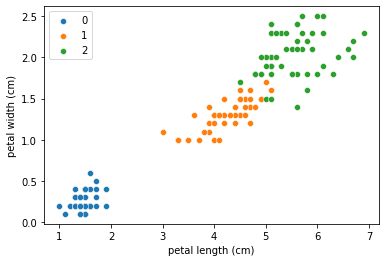

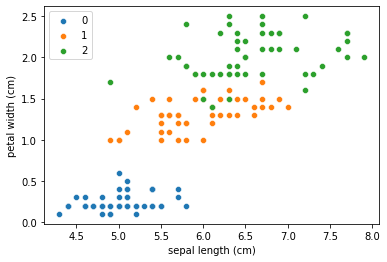

In [275]:
dfs = [df0, df1, df2]

for i in range(len(dfs)):
    sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = dfs[i], label = i)
plt.show()

for i in range(len(dfs)):
    sns.scatterplot(x = 'sepal length (cm)', y = 'petal width (cm)', data = dfs[i], label = i)
plt.show()

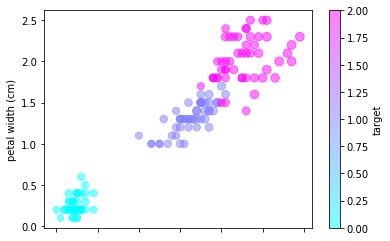

In [276]:
df.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', s = df['sepal length (cm)'] * 10, c = 'target', colorbar = True, cmap = plt.get_cmap('cool'), alpha = 0.5)
plt.show()

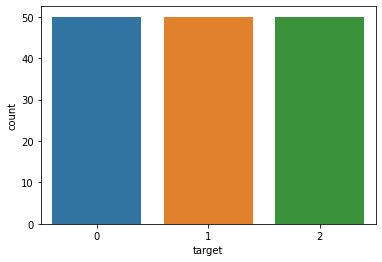

In [277]:
# Count Plot

sns.countplot(x = 'target', data = df)
plt.show()

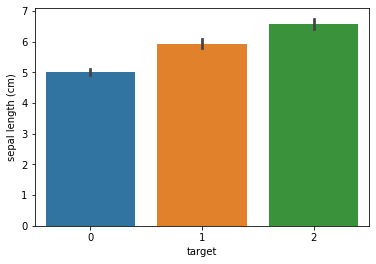

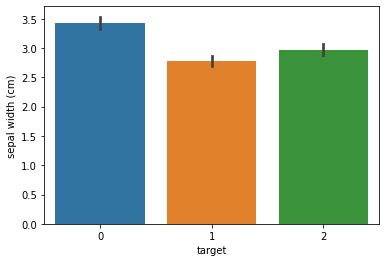

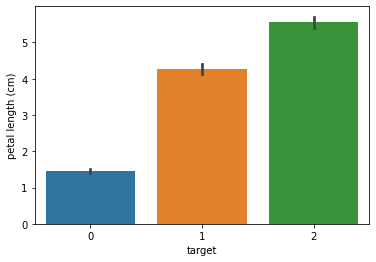

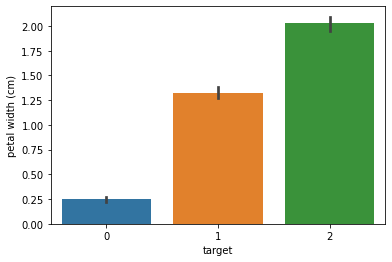

In [278]:
# Bar Chart

for var in num_attr:
    sns.barplot(x = 'target', y = var, data = df)
    plt.show()

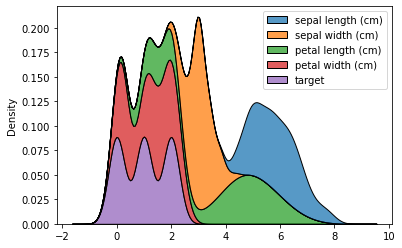

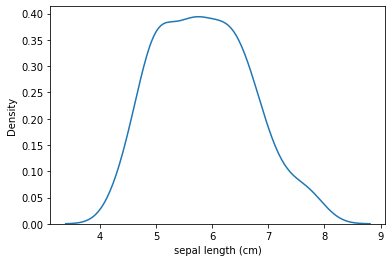

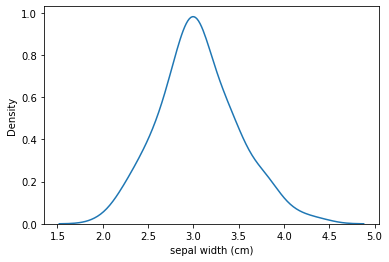

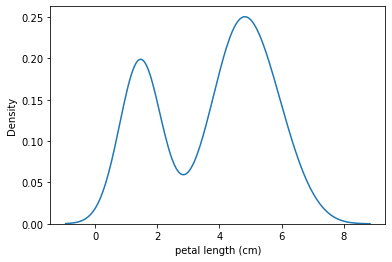

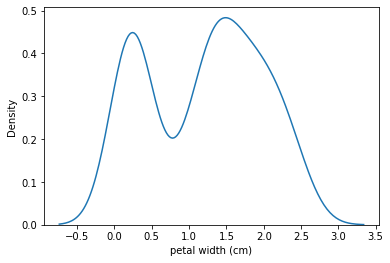

In [279]:
# Kernel Density Plot

sns.kdeplot(data = df, multiple = 'stack')
plt.show()

for var in num_attr:
    sns.kdeplot(x = var, data = df)
    plt.show()

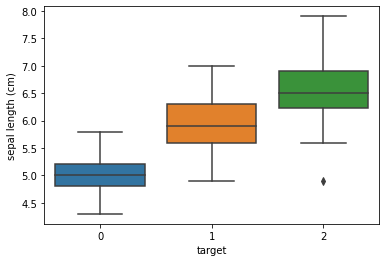

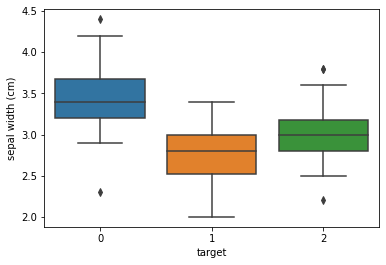

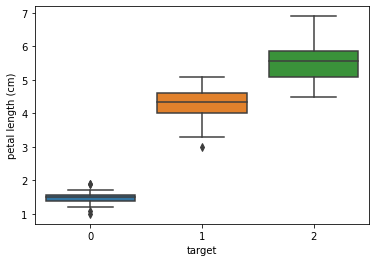

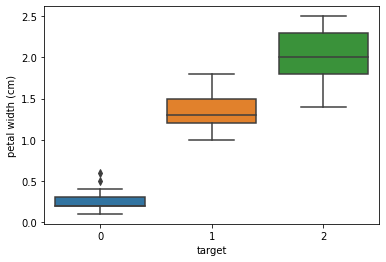

In [280]:
# Box Plot (Identifies Skewness)

for var in num_attr:
    sns.boxplot(x = 'target', y = var, data = df)
    plt.show()

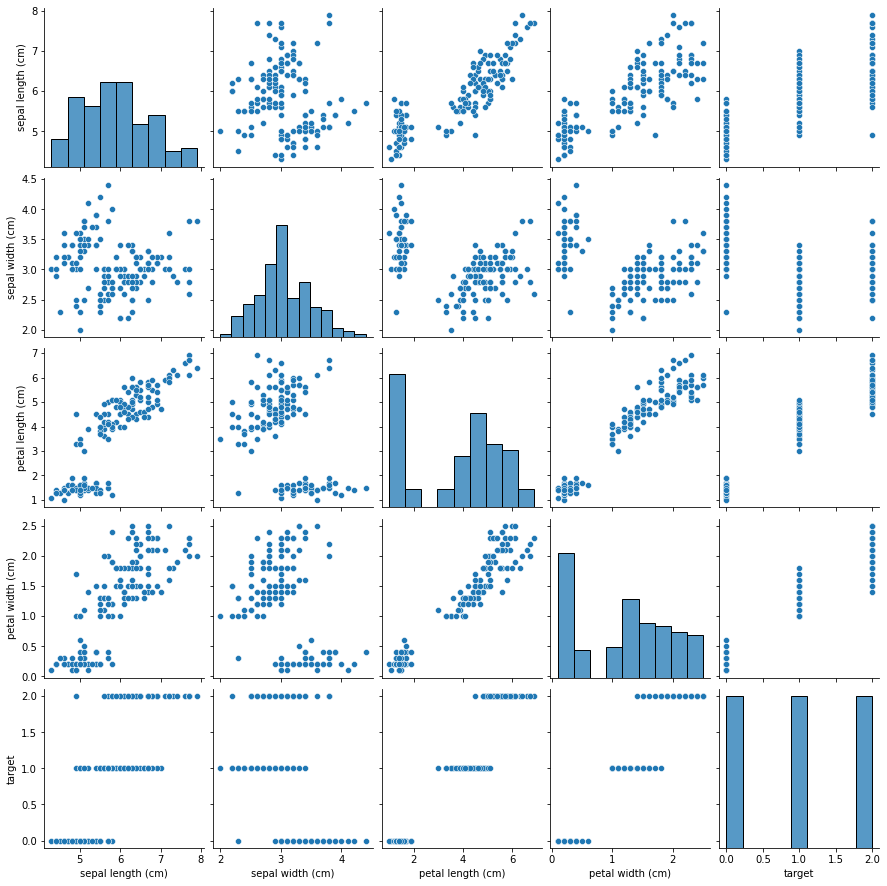

In [281]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

In [282]:
X = df.drop('target', axis = 1).values
y = df['target'].values

In [283]:
# Scaling the features

scaler = preprocessing.StandardScaler()

X_ = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_, columns = df.columns[:-1])
scaled_df['target'] = y.copy()

scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


### Preparing the data

In [284]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(scaled_df, scaled_df[['target']]):
    train_set = scaled_df.iloc[train_index]
    test_set = scaled_df.iloc[test_index]

In [285]:
print(train_set.shape, test_set.shape)

(120, 5) (30, 5)


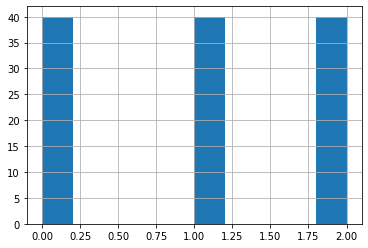

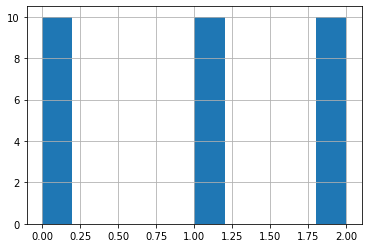

In [286]:
# Checking whether the samples are uniformely distributed

train_set['target'].hist()
plt.show()

test_set['target'].hist()
plt.show()

In [287]:
X_train = train_set.drop('target', axis = 1).values
X_test = test_set.drop('target', axis = 1).values
y_train = train_set['target'].values
y_test = test_set['target'].values

### Training the model and Evaluating it's performance

In [288]:
# Implementing KNN Classifier from scratch (Distance Metric : Euclidean Distance)

class KNNClassifier:
    
    def __init__(self, n_neighbors = 3):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_, self.y_ = X, y
        
    def predict(self, X):
        i, y_pred = 0, np.zeros(X.shape[0]).astype(int)
        for x1 in X:
            distances = [self.dist(x1, x2) for x2 in self.X_]
            k_nearest_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_labels = self.y_[k_nearest_indices]
            y_pred[i] = stats.mode(k_nearest_labels, keepdims = False)[0]
            i += 1
        return y_pred
        
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc
        
    @staticmethod
    def dist(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

In [289]:
# Training the Classifier

clf = KNNClassifier(n_neighbors = 1)

clf.fit(X_train, y_train)

In [290]:
y_train_pred = clf.predict(X_train)

print(y_train_pred)

print("Train Accuracy :", clf.score(X_train, y_train))

[2 0 0 2 2 2 1 0 0 0 2 1 2 2 2 0 0 0 1 2 2 1 0 0 0 1 1 1 1 2 0 0 0 2 2 1 0
 0 0 2 2 0 0 1 1 2 2 1 1 1 2 2 1 2 1 2 2 2 2 0 2 0 1 1 1 0 1 2 0 0 1 1 0 2
 1 0 2 0 0 0 1 1 1 0 1 2 1 2 1 1 1 0 1 2 2 0 2 1 2 1 2 0 2 2 2 2 1 0 2 1 0
 0 0 1 1 0 0 0 1 1]
Training Accuracy : 1.0


In [291]:
print("Test Accuracy :", clf.score(X_test, y_test))

Testing Accuracy : 0.8666666666666667


In [292]:
# Choosing an optimal value of 'n_neighbors' i.e. k

s1, s2 = [], []

for i in range(1, len(y_test), 2):
    m = KNNClassifier(n_neighbors = i)
    m.fit(X_train, y_train)
    s1.append(m.score(X_train, y_train))
    s2.append(m.score(X_test, y_test))

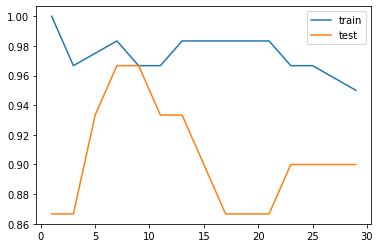

In [293]:
sns.lineplot(x = np.arange(1, len(y_test), 2), y = s1, label = 'train')
sns.lineplot(x = np.arange(1, len(y_test), 2), y = s2, label = 'test')
plt.legend()
plt.show()

# Note : At k = 7, the accuracy (metric) is optimal for both training and testing dataset

In [294]:
model = neighbors.KNeighborsClassifier(n_neighbors = 7)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

print("Training Accuracy :", model.score(X_train, y_train))

Training Accuracy : 0.9833333333333333


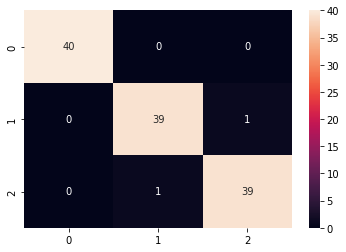

In [295]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [ ]:
# Classification Metrics

precision = metrics.precision_score(y_train, y_train_pred, average = 'weighted')
recall = metrics.recall_score(y_train, y_train_pred, average = 'weighted')
f1_score = metrics.f1_score(y_train, y_train_pred, average = 'weighted')

print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1_score)

In [296]:
# Classification Report

print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        40
           2       0.97      0.97      0.97        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



### Validating the model

In [297]:
y_test_pred = model.predict(X_test)

print("Testing Accuracy :", model.score(X_test, y_test))

Testing Accuracy : 0.9666666666666667


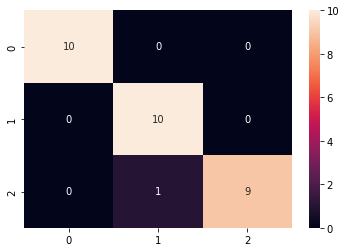

In [298]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [299]:
# Classification Metrics

precision = metrics.precision_score(y_test, y_test_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred, average = 'weighted')
f1_score = metrics.f1_score(y_test, y_test_pred, average = 'weighted')

print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1_score)

Precision : 0.9696969696969696
Recall : 0.9666666666666667
F1 Score : 0.9665831244778613


In [300]:
# Classification Report

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Cross Validation

In [2]:
kf = model_selection.StratifiedKFold(n_splits = 3)

scores = []

for train_index, test_index in kf.split(X_, y):
    X_train_folds = X_[train_index]
    X_test_folds = X_[test_index]
    y_train_folds = y[train_index]
    y_test_folds = y[test_index]
    
    m = base.clone(model)
    m.fit(X_train_folds, y_train_folds)
    scores.append(m.score(X_test_folds, y_test_folds))

NameError: name 'model_selection' is not defined

In [302]:
print("Cross Validation Scores :", scores)
print("Average Cross Validation Score :", np.sum(scores) / len(scores))

Cross Validation Scores : [0.98, 0.96, 0.94]
Average Cross Validation Score : 0.96


In [303]:
scores = model_selection.cross_val_score(base.clone(model), X_, y, cv = 3)

print("Cross Validation Scores :", scores)
print("Average Cross Validation Score :", np.sum(scores) / len(scores))

Cross Validation Scores : [0.98 0.96 0.94]
Average Cross Validation Score : 0.96
